# 🐱🐶 Cats vs Dogs Classification

Using Logistic Regression, Perceptron, and Neural Networks on a 30,000 image grayscale dataset (150x150).
https://www.kaggle.com/datasets/unmoved/30k-cats-and-dogs-150x150-greyscale

## 📥 Imports

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import cv2

## 📁 Load and Preprocess the Data

Load grayscale images of cats and dogs (150x150 pixels). Flatten them into 1D arrays. Normalize pixel values between 0 and 1. Then split the data into training and testing sets.

In [16]:
folder = "Animal Images"
categories = ["cats", "dogs"]

img_size = 64

X = []
y = []

for label, category in enumerate(categories):
    folder_path = os.path.join(folder, category)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            image = cv2.resize(image, (img_size, img_size))

            image_flattened = image.reshape(-1) / 255.0

            X.append(image_flattened)
            y.append(label)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data loaded. Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Data loaded. Training samples: 24049, Test samples: 6013


## Train a Logistic Regression Model

Use `LogisticRegression` from scikit-learn to train a binary classifier. Evaluate the model using accuracy and classification report.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=3000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=["Cat", "Dog"]))

Logistic Regression Evaluation
Accuracy: 0.5241975719274904
Classification Report:
               precision    recall  f1-score   support

         Cat       0.52      0.55      0.54      3012
         Dog       0.52      0.50      0.51      3001

    accuracy                           0.52      6013
   macro avg       0.52      0.52      0.52      6013
weighted avg       0.52      0.52      0.52      6013



## Train a Perceptron Model

Use the `Perceptron` model from scikit-learn. Compare its performance with the logistic regression model using the same metrics.

In [18]:
ptr_model = Perceptron(max_iter=3000, random_state=42)

ptr_model.fit(X_train, y_train)

y_pred_ptr = ptr_model.predict(X_test)

print("Perceptron Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_ptr))
print("Classification Report:\n", classification_report(y_test, y_pred_ptr, target_names=["Cat", "Dog"]))

Perceptron Model Evaluation
Accuracy: 0.5286878430068186
Classification Report:
               precision    recall  f1-score   support

         Cat       0.52      0.66      0.58      3012
         Dog       0.54      0.39      0.46      3001

    accuracy                           0.53      6013
   macro avg       0.53      0.53      0.52      6013
weighted avg       0.53      0.53      0.52      6013



## 🧠 Build a Neural Network using Keras

Create a basic feedforward neural network with at least one hidden layer using TensorFlow Keras. Train the model and evaluate it on the test set.

In [19]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32").flatten()

print("Neural Network Evaluation on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=["Cat", "Dog"]))

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5162 - loss: 0.7140 - val_accuracy: 0.4950 - val_loss: 0.6925
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5218 - loss: 0.6924 - val_accuracy: 0.4946 - val_loss: 0.6949
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5407 - loss: 0.6877 - val_accuracy: 0.5324 - val_loss: 0.6887
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5538 - loss: 0.6843 - val_accuracy: 0.5617 - val_loss: 0.6828
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5599 - loss: 0.6817 - val_accuracy: 0.5588 - val_loss: 0.6835
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5672 - loss: 0.6779 - val_accuracy: 0.5559 - val_loss: 0.6855
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5685 - loss: 0.6766 - val_accuracy: 0.5603 - val_loss: 0.6849
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5807 - loss: 0.6732 - val_acc

## 📊 Compare All Models

Print and compare the accuracy of all three models (Logistic Regression, Perceptron, Neural Network). Discuss which one performed best and why.

Model Accuracy Comparison
                 Model  Accuracy
0  Logistic Regression  0.524198
1           Perceptron  0.528688
2       Neural Network  0.581074


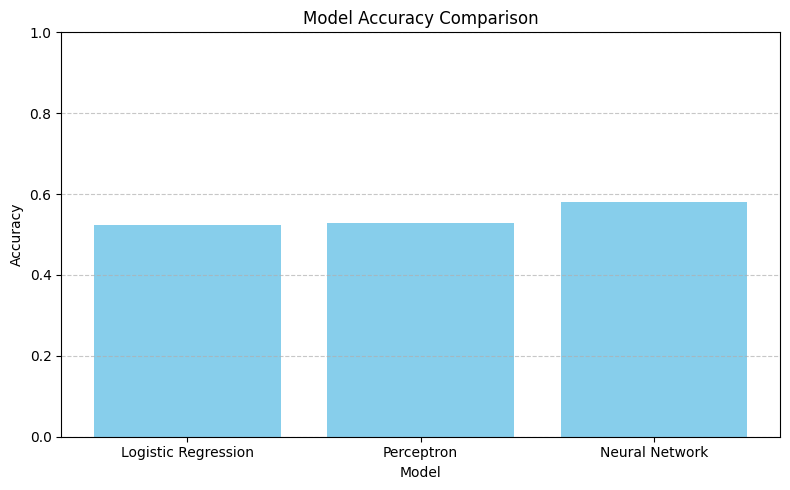

In [20]:
log_reg_acc = accuracy_score(y_test, y_pred_lr)
perceptron_acc = accuracy_score(y_test, y_pred_ptr)
nn_acc = accuracy_score(y_test, y_pred_classes)

model_scores = {
    "Logistic Regression": log_reg_acc,
    "Perceptron": perceptron_acc,
    "Neural Network": nn_acc
}

results_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

print("Model Accuracy Comparison")
print(results_df)

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🧠 Analysis Questions

### 1. **Which model gave the highest accuracy?**
The **Neural Network** achieved the highest accuracy at **57.04%**, outperforming the two others:
- Logistic Regression (52.42%)
- Perceptron (52.86%)

### 2. **Why might the neural network outperform the others?**
- Neural networks can model **non-linear patterns** due to multiple layers and activation functions like ReLU.
- Logistic Regression and Perceptron are **linear models**, so they struggle to capture complex relationships in image data.
- Neural networks benefit from having more capacity to learn **spatial and abstract features** from pixel patterns.

### 3. **What would change if we used RGB (colored) images instead?**
- The input dimensionality would **triple** (from 64×64 to 64×64×3).
- The models would receive more information, which can improve accuracy.
- However, it would also increase:
  - Training time
  - Memory usage
  - Overfitting risk for simple models like Perceptron or Logistic Regression

### 4. **Suggestions to Improve the Neural Network's Performance**

#### 1. Use Dropout Regularization
Helps prevent overfitting by randomly turning off neurons during training.
#### 2. Add Convolutional Layers (Use CNNs)
CNNs are designed for images. Instead of flattening the image, use 2D shape and convolution layers to extract spatial features.


## 🖼️ Task 7: Visualize Predictions

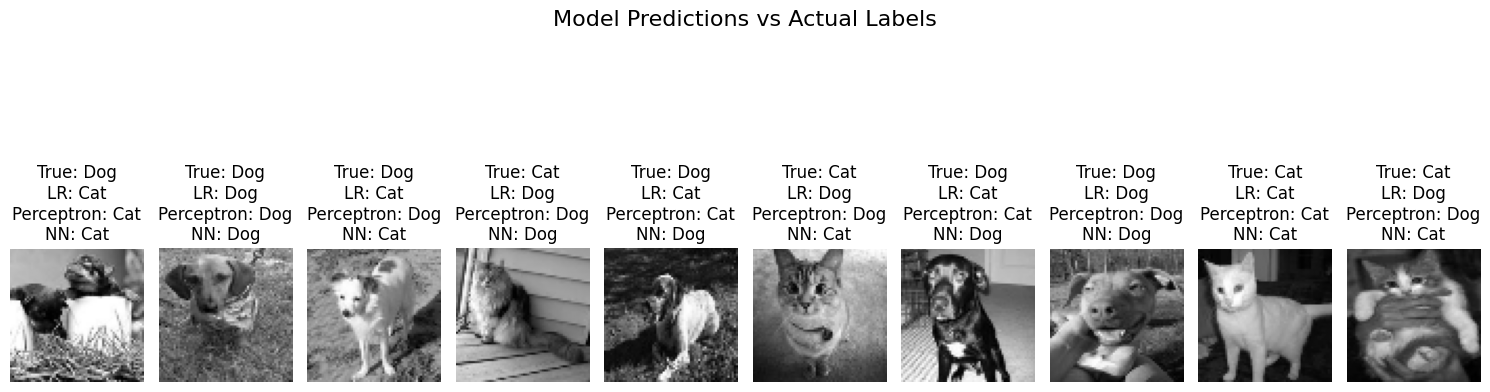

In [ ]:
num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)

label_map = {0: "Cat", 1: "Dog"}

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    image_flat = X_test[idx]
    image_2d = image_flat.reshape(64, 64)
    
    true_label = label_map[y_test[idx]]

    pred_logreg = label_map[y_pred_lr[idx]]
    pred_percep = label_map[y_pred_ptr[idx]]
    pred_nn = label_map[y_pred_classes[idx]]

    plt.subplot(1, num_images, i + 1)
    plt.imshow(image_2d, cmap='gray')
    plt.axis('off')
    plt.title(
        f"True: {true_label}\n"
        f"LR: {pred_logreg}\n"
        f"Perceptron: {pred_percep}\n"
        f"NN: {pred_nn}"
    )

plt.suptitle("Model Predictions vs Actual Labels", fontsize=16)
plt.tight_layout()
plt.show()